# Decision Tree Regression
-------------

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

- Rank: Peringkat penjualan game berdasarkan total penjualan global.
- Name: Nama game.
- Year: Tahun rilis game.
- NA_Sales: Penjualan game di Amerika Utara (dalam jutaan unit).
- EU_Sales: Penjualan game di Eropa (dalam jutaan unit).
- JP_Sales: Penjualan game di Jepang (dalam jutaan unit).
- Other_Sales: Penjualan game di wilayah lain selain Amerika Utara, Eropa, dan Jepang (dalam jutaan unit).
- Global_Sales: Total penjualan global game (dalam jutaan unit).

In [50]:
df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Eksplorasi Data
----------

In [51]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Imputasi Mean

In [52]:
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df.head(4))

   Rank               Name Platform    Year     Genre Publisher  NA_Sales   
0     1         Wii Sports      Wii  2006.0    Sports  Nintendo     41.49  \
1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo     29.08   
2     3     Mario Kart Wii      Wii  2008.0    Racing  Nintendo     15.85   
3     4  Wii Sports Resort      Wii  2009.0    Sports  Nintendo     15.75   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82  
3     11.01      3.28         2.96         33.00  


Beberapa fitur dapat dieksplorasi dengan cara berikut.

In [53]:
cdf = df[['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
cdf.head(10)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37
5,6,1989.0,23.20,2.26,4.22,0.58,30.26
6,7,2006.0,11.38,9.23,6.50,2.90,30.01
7,8,2006.0,14.03,9.20,2.93,2.85,29.02
8,9,2009.0,14.59,7.06,4.70,2.26,28.62
9,10,1984.0,26.93,0.63,0.28,0.47,28.31


plot-plot fitur diatas

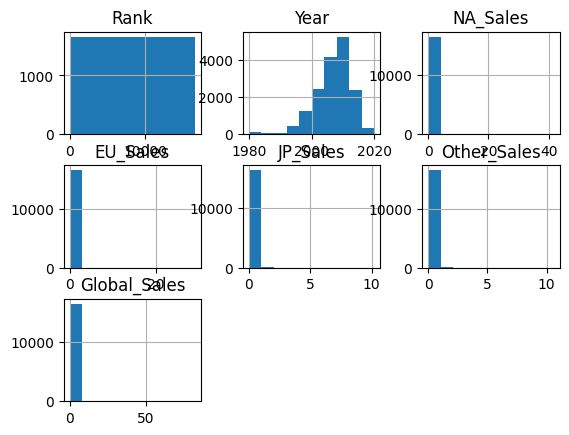

In [54]:
viz = cdf[['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
viz.hist()
plt.show()

Plot fitur-fitur vs emisi dapat dibuat dan dapat dilihat linearitas hubungannya.

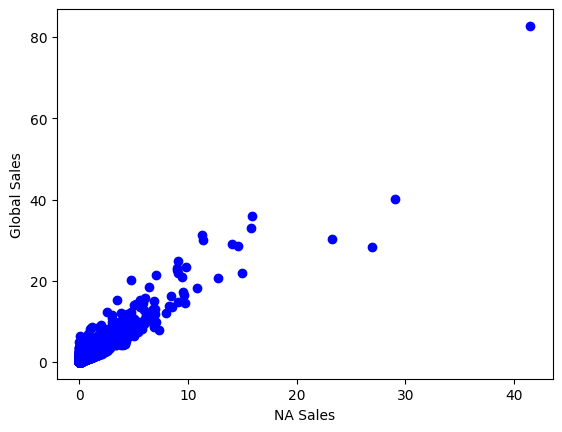

In [55]:
plt.scatter(cdf.NA_Sales, cdf.Global_Sales,  color='blue')
plt.xlabel("NA Sales")
plt.ylabel("Global Sales")
plt.show()

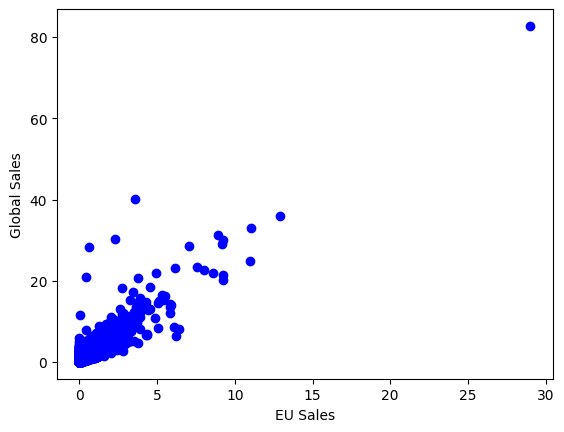

In [56]:
plt.scatter(cdf.EU_Sales, cdf.Global_Sales,  color='blue')
plt.xlabel("EU Sales")
plt.ylabel("Global Sales")
plt.show()

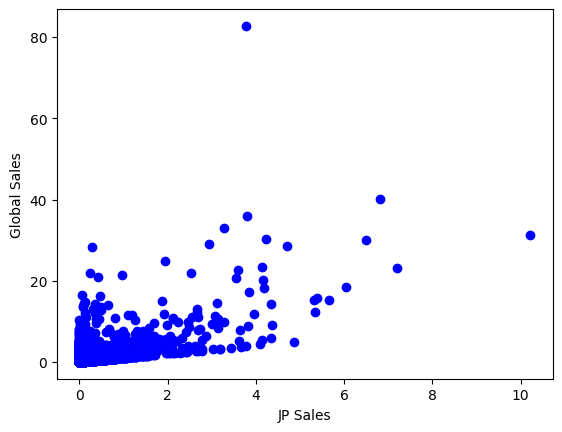

In [57]:
plt.scatter(cdf.JP_Sales, cdf.Global_Sales,  color='blue')
plt.xlabel("JP Sales")
plt.ylabel("Global Sales")
plt.show()

#### Pembuatan Dataset Pelatihan

In [58]:
# Mengambil "JP Sales" sebagai variabel independen (regressor)
X = cdf.iloc[:, 4].values
# Mengambil "Global Sales" sebagai variabel dependen
y = cdf.iloc[:, 6].values
# Reshape data karena hanya menggunakan satu fitur "Engine Size"
X = X.reshape(-1,1)
# Reshape data karena hanya satu fitur
y = y.reshape(-1,1)

Proses splitting dataset pelatihan dan pengujian

In [59]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

Normalisasi atau scaling dataset

In [60]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

Pembuatan Model

In [61]:
# Fitting Decision Tree Regression to the dataset
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

Prediksi nilai baru dengan model yang telah dibentuk

In [62]:
# Predicting a new result
new_data = np.array([[17.6]])

# Lakukan transformasi menggunakan sc_X
new_data_scaled = sc_X.transform(new_data)

# Lakukan prediksi menggunakan regressor
y_pred_scaled = regressor.predict(new_data_scaled)

# Lakukan reshape pada y_pred_scaled
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Lakukan inverse transformasi menggunakan sc_y
y_pred = sc_y.inverse_transform(y_pred_scaled)

# Cetak hasil prediksi
print(y_pred)

[[31.37]]


Visualisasi Hasil dalam nilai yang discaling:

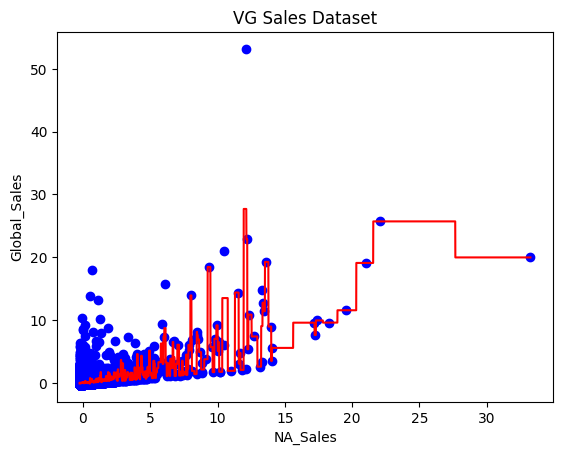

In [63]:
# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_grid, regressor.predict(X_grid), color='red')
plt.title('VG Sales Dataset')
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.show()

Visualisasi Hasil dalam nilai asalnya:

ValueError: Expected 2D array, got 1D array instead:
array=[-0.12240722 -0.12240722 -0.12240722 ... 19.94723645 19.94723645
 19.94723645].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

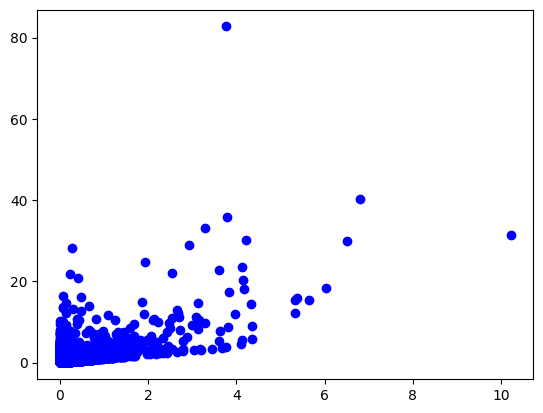

In [64]:
X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((-1, 1))
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color='blue')
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color='red')
plt.title('VG Sales Dataset')
plt.xlabel('NA_Sales')
plt.ylabel('Global_Sales')
plt.show()

Visualisasi Tree (dengan nilai yang discaling):

In [69]:
import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(regressor, out_file=None, feature_names=['VG Sales'],  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree")  # Opsional: simpan gambar sebagai file PNG dengan nama "regression_tree"
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Evaluasi
--------

In [65]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(X)  
test_y = np.asanyarray(y)
test_y_ = regressor.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 0.50
Residual sum of squares (MSE): 2.64
R2-score: -0.02


Arti dari metrik evaluasi ini adalah sebagai berikut:

- MAE sebesar 0.50 menunjukkan bahwa rata-rata selisih absolut antara prediksi dan nilai sebenarnya adalah 0.50.
- MSE sebesar 2.64 menunjukkan jumlah kuadrat selisih antara prediksi dan nilai sebenarnya adalah 2.64.
- R2-score sebesar -0.02 menunjukkan bahwa model regresi tidak memiliki kemampuan yang baik dalam menjelaskan variabilitas dalam data, dan hasil prediksinya lebih buruk daripada menggunakan rata-rata nilai target.

Dalam konteks dataset dan model yang digunakan, MAE yang rendah menunjukkan tingkat kesalahan prediksi yang rendah. Namun, MSE yang cukup tinggi menunjukkan bahwa terdapat penyebaran yang signifikan antara prediksi dan nilai sebenarnya. R2-score yang negatif menunjukkan bahwa model regresi tidak mampu menjelaskan variabilitas dalam data dan hasil prediksinya tidak lebih baik daripada menggunakan rata-rata. Hal ini mengindikasikan bahwa model yang digunakan perlu diperbaiki atau mungkin ada faktor lain yang perlu dipertimbangkan dalam memprediksi nilai target.